# Client Presentation 2: Regression Models

This notebook will take a dataset, remove multicollinearity and near-zero variance, and create the KNN Regression Model.

## 1. Read in Data, Import Packages

In [154]:
import numpy as np
import pandas as pd

pts_df = pd.read_csv('/Users/dB/Documents/repos/github/bint-capstone/data-sources/df_scaled_points_top_3.csv')
to_df = pd.read_csv('/Users/dB/Documents/repos/github/bint-capstone/data-sources/df_scaled_turnovers.csv')
ast_df = pd.read_csv('/Users/dB/Documents/repos/github/bint-capstone/data-sources/df_scaled_assists.csv')

In [155]:
pts_df.head()

,rebounds_offensive,three_pointers_percentage,free_throws_attempted,defended_at_rim_field_goals_attempted,estimated_defensive_rating,defensive_rebound_percentage,touches,estimated_offensive_rating,defended_at_rim_field_goal_percentage,turnover_ratio,...,rebound_percentage,true_shooting_percentage,estimated_pace,pace,defensive_rating,offensive_rebound_percentage,contested_field_goal_percentage,possessions,points,is_home_team
0,-1.135701,1.143999,0.036112,-0.194680,-1.269472,0.367155,1.568215,0.664829,-0.122005,-1.366033,...,0.157283,0.482557,-1.446284,-1.725084,-0.995316,-0.868839,-0.185888,-1.646399,-0.296391,1.0
1,-1.135701,0.567548,-0.375301,-0.983717,1.815185,-3.774630,-0.943649,-0.724118,1.923774,0.270539,...,-2.803681,-0.330435,-2.787959,-2.591398,1.540368,-2.752196,-0.264480,-2.330851,-1.657108,1.0
2,-1.398928,1.296269,0.173250,-0.825910,1.815185,0.273275,-1.390202,-0.212849,0.585061,2.400681,...,0.088423,1.183962,-2.425140,-2.398884,1.685998,-0.329226,0.285665,-2.330851,-1.203536,1.0
3,0.180433,1.143999,-0.375301,-0.194680,0.085391,-3.774630,0.703017,-0.161722,0.660482,-0.456826,...,-2.803681,-0.489845,-1.725957,-1.821341,0.058364,-0.001225,-0.736033,-1.817512,-0.901154,1.0
4,-1.398928,1.774832,-0.101026,-0.668102,-0.545174,0.720588,0.842565,0.630745,-0.631093,2.582522,...,0.833359,2.363598,-0.924731,-0.569998,-0.806853,-0.022387,2.564838,-0.619722,0.157181,1.0


In [156]:
print(pts_df.columns.tolist())

['rebounds_offensive', 'three_pointers_percentage', 'free_throws_attempted', 'defended_at_rim_field_goals_attempted', 'estimated_defensive_rating', 'defensive_rebound_percentage', 'touches', 'estimated_offensive_rating', 'defended_at_rim_field_goal_percentage', 'turnover_ratio', 'contested_field_goals_made', 'steals', 'free_throws_made', 'free_throws_percentage', 'effective_field_goal_percentage', 'contested_field_goals_attempted', 'rebound_chances_defensive', 'three_pointers_made', 'turnovers', 'estimated_team_turnover_percentage', 'opponent_points', 'rebound_percentage', 'true_shooting_percentage', 'estimated_pace', 'pace', 'defensive_rating', 'offensive_rebound_percentage', 'contested_field_goal_percentage', 'possessions', 'points', 'is_home_team']


In [157]:
to_df.head()

,rebounds_offensive,three_pointers_percentage,passes,assist_ratio,free_throws_attempted,uncontested_field_goals_attempted,field_goals_attempted,estimated_defensive_rating,defensive_rebound_percentage,touches,...,p_i_e,estimated_team_turnover_percentage,rebound_percentage,true_shooting_percentage,estimated_pace,pace,defensive_rating,offensive_rebound_percentage,possessions,turnovers
0,-1.135701,1.143999,2.038227,0.944887,0.036112,-1.277025,-1.151552,-1.269472,0.367155,1.568215,...,1.371537,-1.363854,0.157283,0.482557,-1.446284,-1.725084,-0.995316,-0.868839,-1.646399,-1.409342
1,-1.135701,0.567548,-0.490530,-1.642507,-0.375301,-1.148173,-2.092907,1.815185,-3.774630,-0.943649,...,-2.282225,0.255896,-2.803681,-0.330435,-2.787959,-2.591398,1.540368,-2.752196,-2.330851,-0.115465
2,-1.398928,1.296269,-1.038935,-0.644958,0.173250,-2.436696,-3.303220,1.815185,0.273275,-1.390202,...,-1.517746,2.344045,0.088423,1.183962,-2.425140,-2.398884,1.685998,-0.329226,-2.330851,1.695962
3,0.180433,1.143999,1.063285,0.851367,-0.375301,-1.019321,-0.613635,0.085391,-3.774630,0.703017,...,-0.247361,-0.504059,-2.803681,-0.489845,-1.725957,-1.821341,0.058364,-0.001225,-1.817512,-0.633016
4,-1.398928,1.774832,1.307020,1.693049,-0.101026,-1.792434,-2.496345,-0.545174,0.720588,0.842565,...,1.416506,2.661888,0.833359,2.363598,-0.924731,-0.569998,-0.806853,-0.022387,-0.619722,2.213513


In [158]:
print(to_df.columns.tolist())

['rebounds_offensive', 'three_pointers_percentage', 'passes', 'assist_ratio', 'free_throws_attempted', 'uncontested_field_goals_attempted', 'field_goals_attempted', 'estimated_defensive_rating', 'defensive_rebound_percentage', 'touches', 'free_throw_assists', 'estimated_offensive_rating', 'turnover_ratio', 'contested_field_goals_made', 'steals', 'estimated_usage_percentage', 'free_throws_made', 'fouls_personal', 'effective_field_goal_percentage', 'offensive_rating', 'three_pointers_attempted', 'points', 'three_pointers_made', 'rebound_chances_defensive', 'p_i_e', 'estimated_team_turnover_percentage', 'rebound_percentage', 'true_shooting_percentage', 'estimated_pace', 'pace', 'defensive_rating', 'offensive_rebound_percentage', 'possessions', 'turnovers']


In [159]:
ast_df.head()

,rebounds_total,rebounds_offensive,three_pointers_percentage,passes,assist_ratio,free_throws_attempted,field_goals_attempted,estimated_defensive_rating,defensive_rebound_percentage,uncontested_field_goals_percentage,...,rebound_percentage,blocks,true_shooting_percentage,estimated_pace,assist_to_turnover,pace,defensive_rating,offensive_rebound_percentage,contested_field_goal_percentage,assists
0,-0.575796,-1.135701,1.143999,2.038227,0.944887,0.036112,-1.151552,-1.269472,0.367155,0.468428,...,0.157283,-0.331987,0.482557,-1.446284,1.598707,-1.725084,-0.995316,-0.868839,-0.185888,0.240644
1,-2.550869,-1.135701,0.567548,-0.490530,-1.642507,-0.375301,-2.092907,1.815185,-3.774630,-0.031509,...,-2.803681,-1.529692,-0.330435,-2.787959,-1.063684,-2.591398,1.540368,-2.752196,-0.264480,-2.044974
2,-2.702798,-1.398928,1.296269,-1.038935,-0.644958,0.173250,-3.303220,1.815185,0.273275,1.037801,...,0.088423,-1.529692,1.183962,-2.425140,-1.251176,-2.398884,1.685998,-0.329226,0.285665,-1.283102
3,-1.031582,0.180433,1.143999,1.063285,0.851367,-0.375301,-0.613635,0.085391,-3.774630,0.149024,...,-2.803681,-1.529692,-0.489845,-1.725957,0.636247,-1.821341,0.058364,-0.001225,-0.736033,0.431112
4,-0.727725,-1.398928,1.774832,1.307020,1.693049,-0.101026,-2.496345,-0.545174,0.720588,0.426767,...,0.833359,-0.331987,2.363598,-0.924731,-0.688699,-0.569998,-0.806853,-0.022387,2.564838,1.192985


In [160]:
print(ast_df.columns.tolist())

['rebounds_total', 'rebounds_offensive', 'three_pointers_percentage', 'passes', 'assist_ratio', 'free_throws_attempted', 'field_goals_attempted', 'estimated_defensive_rating', 'defensive_rebound_percentage', 'uncontested_field_goals_percentage', 'free_throw_assists', 'plus_minus_points', 'estimated_offensive_rating', 'turnover_ratio', 'rebounds_defensive', 'contested_field_goals_made', 'steals', 'estimated_usage_percentage', 'free_throws_made', 'fouls_personal', 'effective_field_goal_percentage', 'contested_field_goals_attempted', 'offensive_rating', 'three_pointers_attempted', 'points', 'rebound_chances_defensive', 'p_i_e', 'estimated_team_turnover_percentage', 'opponent_points', 'rebound_percentage', 'blocks', 'true_shooting_percentage', 'estimated_pace', 'assist_to_turnover', 'pace', 'defensive_rating', 'offensive_rebound_percentage', 'contested_field_goal_percentage', 'assists']


In [161]:
pts_x = pts_df.drop(['points'], axis=1)
pts_y = pts_df['points']

to_x = to_df.drop(['turnovers'], axis=1)
to_y = to_df['turnovers']

ast_x = ast_df.drop(['assists'], axis=1)
ast_y = ast_df['assists']

In [162]:
type(pts_y)

pandas.core.series.Series

# Removing Near-Zero Variance and Multicollinearity

The following functions will remove multicollinearity between independent variables and near-zero variance in predictors.

In [163]:
'''
This function drops highly correlated variables given a threshold.
It drops the variable with smaller variance.

It returns:
1. The variables that were dropped
2. The data without the dropped variables
'''

def drop_highly_correlated(data, threshold=.7):
    from dython.nominal import associations
    cor_matrix = associations(dataset=data, compute_only=True)['corr'].abs()
    #cor_matrix = data.corr().abs()
    sol = (cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))).unstack().dropna()

    to_drop=[]
    for i in range(len(sol[sol > threshold].index.tolist())):
        var1 = sol[sol >= threshold].index.tolist()[i][0]
        var2 = sol[sol >= threshold].index.tolist()[i][1]

        if(data[var1].var() < data[var2].var()): 
            to_drop.append(var1)
        else: 
            to_drop.append(var2)

    dropped_vars = list(set(to_drop))
    return dropped_vars, data.drop(dropped_vars, axis=1) # (list of dropped vars, resultant df)

In [164]:
'''
remove_nzv_features removes features in the DataFrame with a variance below the parameter threshold. 
This is done by creating a mask using the sklearn VarianceThreshold function.

returns a tuple of the dataframe with the selected features (retained_df) and a dataframe of the dropped features (dropped_df)
'''
def remove_nzv_features(df:pd.DataFrame, threshold=.1): 
    from sklearn.feature_selection import VarianceThreshold

    vThreshold = VarianceThreshold(threshold)
    vThreshold.fit_transform(df)

    # Get boolean mask for selected columns
    mask = vThreshold.get_support()
    
    # Select columns to keep and drop
    selected_columns = df.columns[mask]
    dropped_columns = df.columns[~mask]
    
    # Create DataFrames for retained and removed features
    retained_df = df[selected_columns]
    dropped_df = df[dropped_columns]

    return retained_df, dropped_df

Finally, this produces a correlation plot of the results of removing the misleading features.

In [165]:
def my_corrplot(df, dep_var):
    import seaborn as sns
    from dython.nominal import associations
    import matplotlib.pyplot as plt

    # create a correlation matrix of all predictor variables using 'associations'
    corr_matrix = associations(dataset=df.drop(dep_var, axis=1), compute_only=True)['corr']

    # Mask upper triangle of the corr heatmap ???
    mask_upper = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Plot
    plt.figure(figsize=(44,44))
    sns.heatmap(corr_matrix, annot=True, mask=mask_upper, fmt='.2f', vmin=-1, vmax=1)
    plt.show()

Now we can apply these functions to the data.

In [166]:
pts_x_no_multi = drop_highly_correlated(pts_x)[1]
print(type(pts_x_no_multi))
pts_x_no_nzv = remove_nzv_features(pts_x_no_multi)[0]

<class 'pandas.core.frame.DataFrame'>


In [167]:
pts_x_no_multi.shape



(28140, 20)

In [168]:
pts_x_no_nzv.shape

(28140, 20)

In [169]:
type(pts_x_no_nzv)

pandas.core.frame.DataFrame

In [170]:
pts_nu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28140 entries, 0 to 28139
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   points                             28140 non-null  float64
 1   rebounds_offensive                 28140 non-null  float64
 2   three_pointers_percentage          28140 non-null  float64
 3   uncontested_field_goals_attempted  28140 non-null  float64
 4   field_goals_attempted              28140 non-null  float64
 5   touches                            28140 non-null  float64
 6   plus_minus_points                  28140 non-null  float64
 7   contested_field_goals_made         28140 non-null  float64
 8   free_throws_made                   28140 non-null  float64
 9   contested_field_goals_attempted    28140 non-null  float64
 10  three_pointers_attempted           28140 non-null  float64
 11  opponent_points                    28140 non-null  flo

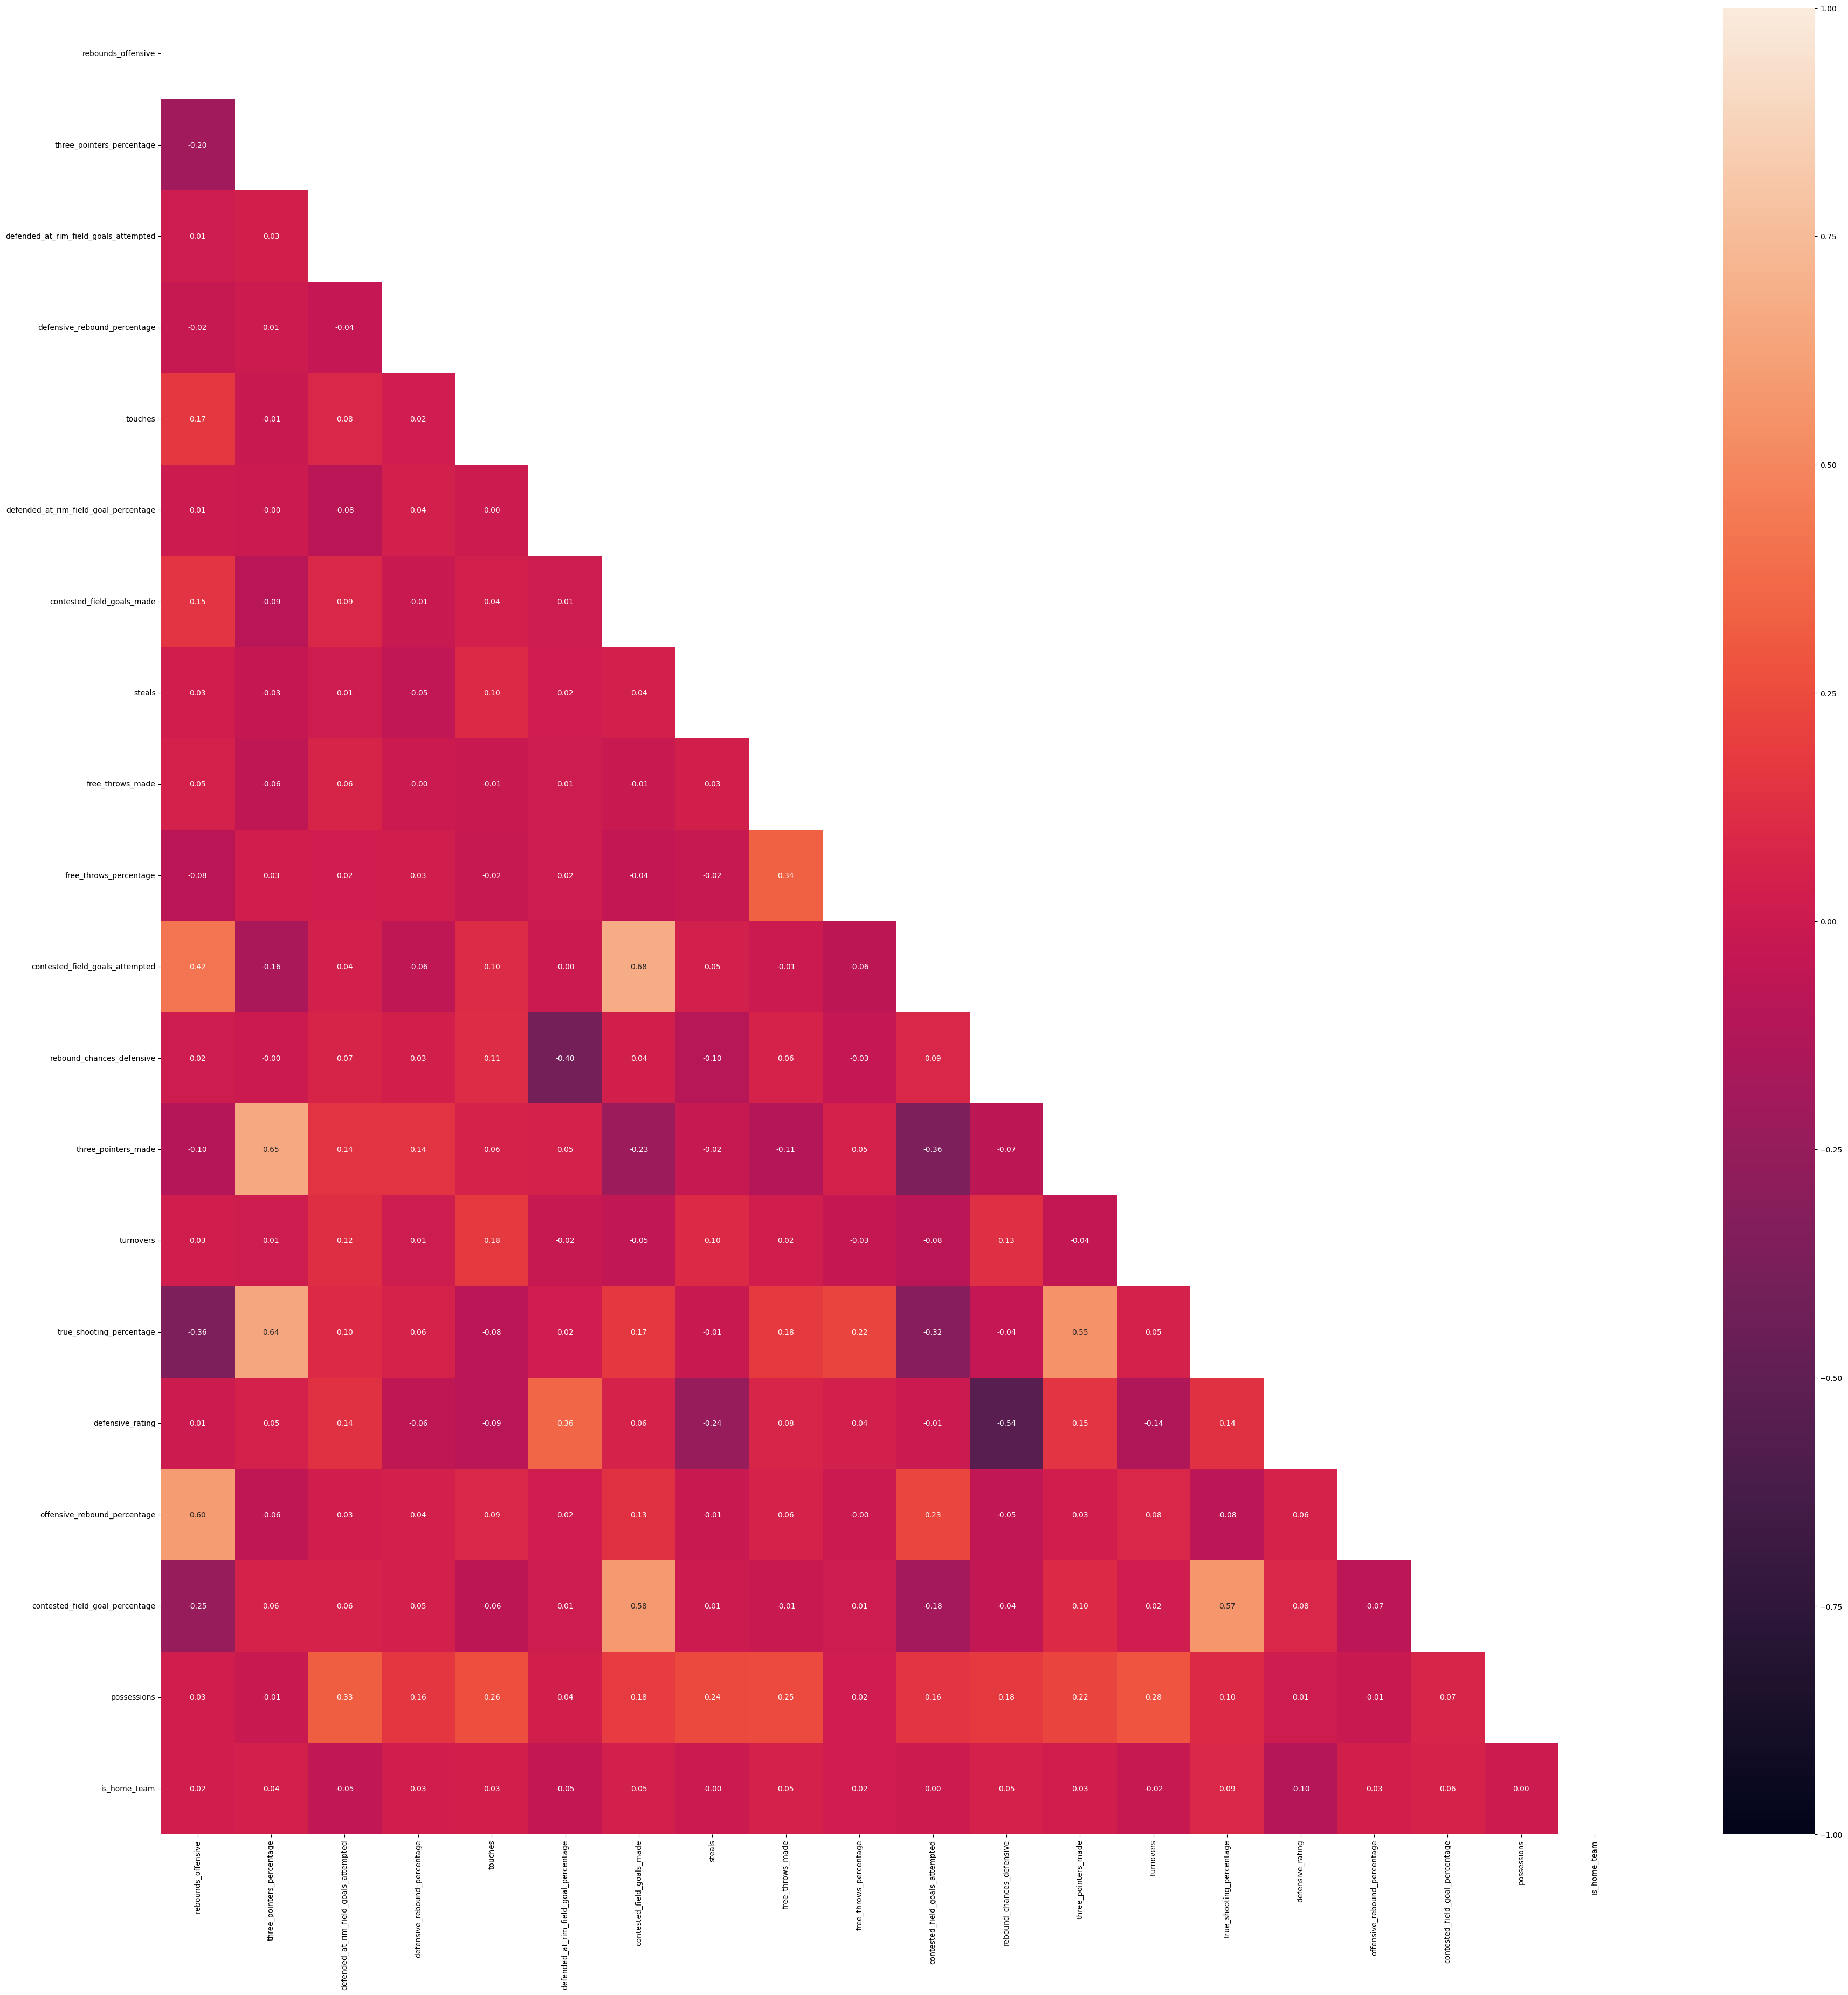

In [171]:
pts_nu_df = pd.concat([pts_y, pts_x_no_nzv], axis=1)
my_corrplot(pts_nu_df, 'points')

## 3. MLR Model

In [172]:
from sklearn.model_selection import train_test_split

X = pts_nu_df.loc[:, pts_nu_df.columns != 'points']
y = pts_nu_df.loc[:, pts_nu_df.columns == 'points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [173]:
X.shape[0] == y.shape[0]

True

In [174]:
import statsmodels.api as sm

train_X = sm.add_constant(X_train)

model = sm.OLS(y_train, train_X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 3.966e+04
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:23:30   Log-Likelihood:                 8457.0
No. Observations:               22512   AIC:                        -1.687e+04
Df Residuals:                   22491   BIC:                        -1.670e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.0002      0.001     -0.146      0.884      -0.002       0.002
rebounds_offensive                        0.2417      0.002    147.610      0.000       0.239       0.245
three_pointers_percentage                -0.0215      0.002    -10.684      0.000      -0.025      -0.018
defended_at_rim_field_goals_attempted    -0.0007      0.001     -0.557      0.578      -0.003       0.002
defensive_rebound_percentage             -0.0033      0.001     -2.874      0.004      -0.006      -0.001
touches                                   0.0050      0.001      4.187      0.000       0.003       0.007
defended_at_rim_field_goal_percentage    -0.0018      0.001     -1.467      0.142      -0.004       0.001
contested_field_goals_made                0.1156      0.007     15.991      0.000       0.101       0.130
steals                                    0.0005      0.001      0.418      0.676      -0.002       0.003
free_throws_made                          0.0237      0.001     16.871      0.000       0.021       0.026
free_throws_percentage                   -0.0025      0.001     -2.063      0.039      -0.005      -0.000
contested_field_goals_attempted          -0.0319      0.006     -5.259      0.000      -0.044      -0.020
rebound_chances_defensive                -0.0056      0.002     -3.692      0.000      -0.009      -0.003
three_pointers_made                       0.0736      0.002     35.974      0.000       0.070       0.078
turnovers                                -0.2961      0.001   -233.503      0.000      -0.299      -0.294
true_shooting_percentage                  0.8234      0.003    325.382      0.000       0.818       0.828
defensive_rating                          0.0172      0.002     11.134      0.000       0.014       0.020
offensive_rebound_percentage              0.0624      0.001     43.317      0.000       0.060       0.065
contested_field_goal_percentage          -0.0664      0.005    -12.473      0.000      -0.077      -0.056
possessions                               0.4583      0.002    282.143      0.000       0.455       0.461
is_home_team                              0.0015      0.001      1.354      0.176      -0.001       0.004
==============================================================================
Omnibus:                      161.029   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.838
Skew:                           0.138   Prob(JB):                     2.98e-43
Kurtosis:                       3.365   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of 

In [179]:
from sklearn.neighbors import KNeighborsRegressor

# Creating the Model for KNN Regression
# n_jobs=-1 specifies to use all cores and threads available
knn_model = KNeighborsRegressor(n_neighbors=5, n_jobs=-1).fit(X_train, y_train)
knn_model

KeyError: "['const'] not found in axis"

In [176]:
knn_pred = knn_model.predict(X_test)
knn_pred

array([[ 1.44230333],
       [ 0.21765781],
       [-0.28127185],
       ...,
       [ 0.05134792],
       [ 0.77706378],
       [ 0.47468218]])

In [177]:
import statsmodels.api as sm
import scipy.stats as stats

# Compute Residuals
knn_res = y_test - knn_pred
knn_res

,points
19086,0.377977
11896,0.468691
16394,-0.090714
1353,-0.771073
1959,0.015119
...,...
18654,0.589644
16411,0.241905
23004,0.332620
21675,-0.015119


NameError: name 'plt' is not defined

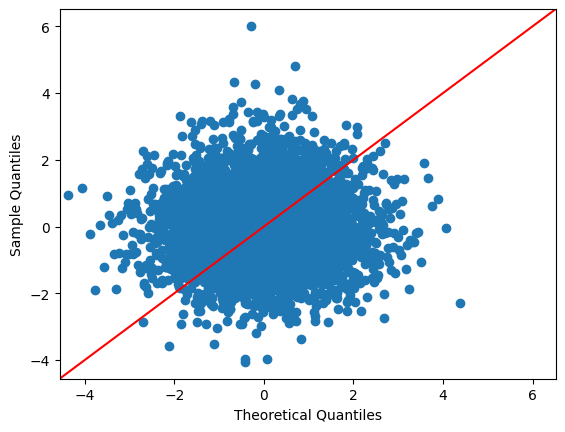

In [178]:
fig = sm.qqplot(knn_res, stats.t, fit=True, line='45')
plt.show()